# Deep Learning with Python - Ch. 5.2 Notes

**Classifying photos with dogs or cats using convnets**

There are 4000 images total. Here's how we'll split them:
* 2000 training images
* 1000 validation images
* 1000 testing images

We'll start by creating a baseline model - a naive, small convnet (no regularization).

In [14]:
# # gather data (only works once)

# import os, shutil
# # The path to the directory where the original
# # dataset was uncompressed

# REPLACE WITH LOCATION OF DATASET
# original_dataset_dir = './data/dogs-vs-cats'

# # The directory where we will
# # store our smaller dataset

# REPLACE WITH LOCATION YOU'D LIKE TO STORE THIS DATASET
# base_dir = './data/cats-vs-dogs-small'
# os.mkdir(base_dir)

# # Directories for our training,
# # validation and test splits
# train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
# validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
# test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

# # Directory with our training cat pictures
# train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

# # Directory with our training dog pictures
# train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

# # Directory with our validation cat pictures
# validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)

# # Directory with our validation dog pictures
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

# # Directory with our validation cat pictures
# test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

# # Directory with our validation dog pictures
# test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

# # Copy first 1000 cat images to train_cats_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, 'train/' + fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)

# # Copy next 500 cat images to validation_cats_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, 'train/' + fname)
#     dst = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src, dst)
    
# # Copy next 500 cat images to test_cats_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, 'train/' + fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src, dst)
    
# # Copy first 1000 dog images to train_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, 'train/' + fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)
    
# # Copy next 500 dog images to validation_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, 'train/' + fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src, dst)
    
# # Copy next 500 dog images to test_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, 'train/' + fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src, dst)

Sanity check - make sure we have the correct num images for each set.

In [21]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In the last example (MNIST), we had smaller images. Here, we have larger, color images, which makes for more complexity. Therefore we'll add an extra hidden `Conv2D` + `MaxPooling2D` stage.

Remember that each of these stages effectively halves the data. So, we'll end up with feature maps of size 7x7 just before the `Flatten` layer.

**NOTE** the **depth** of the feature maps progressively **increases** in the network (from 32 to 128), whereas the **size** of the feature maps **decreases** (from 148 x 148 to 7 x 7).
* This is the standard for convnets.

In [28]:
from keras import layers, models

model = models.Sequential()

# convolutional layers (3 hidden conv/maxPooling stages)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# flatten current output to 2D so we can use classifier layers
model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # binary output

In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)      

## Compilation step

We'll use the `rmsprop` optimizer per usual. 

Since it's a binary problem, `loss=binary_crossentropy`.

In [29]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Reading Images from Disk

Keras makes this easy with the `ImageDataGenerator` class.

It uses a generator (which `yields` one image at a time, rather than keeping them all in memory).

In [37]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) # rescales all images by 1/255
test_datagen = ImageDataGenerator(rescale=1./255) # rescales all images by 1/255

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [38]:
train_generator?

In [39]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


## Fitting the model using a batch generator


The thing to remember here is that generators will endlessly yield data, so we need to tell Keras how many samples to look at, so it knows when to stop.

**Chollet's explanation:**

"
Let's fit our model to the data using the generator.

Because the data is being generated endlessly, the generator needs to know example how many samples to draw from the generator before 
declaring an epoch over. This is the role of the `steps_per_epoch` argument: after having drawn `steps_per_epoch` batches from the 
generator, i.e. after having run for `steps_per_epoch` gradient descent steps, the fitting process will go to the next epoch. In our case, 
batches are 20-sample large, so it will take 100 batches until we see our target of 2000 samples.

When using a generator, one may pass a `validation_data` argument, much like with the `fit` method. Importantly, this argument is 
allowed to be a data generator itself, but it could be a tuple of Numpy arrays as well. If you pass a generator as `validation_data`, then 
this generator is expected to yield batches of validation data endlessly, and thus you should also specify the `validation_steps` argument, 
which tells the process how many batches to draw from the validation generator for evaluation.
"

In [40]:
history = model.fit(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/30
100/100 [==============================] - 31s 309ms/step - loss: 0.6651 - acc: 0.6035 - val_loss: 0.6567 - val_acc: 0.5940
Epoch 2/30
100/100 [==============================] - 31s 308ms/step - loss: 0.6316 - acc: 0.6340 - val_loss: 0.5979 - val_acc: 0.6980
Epoch 3/30
100/100 [==============================] - 31s 307ms/step - loss: 0.5819 - acc: 0.6880 - val_loss: 0.5726 - val_acc: 0.6890
Epoch 4/30
100/100 [==============================] - 31s 309ms/step - loss: 0.5486 - acc: 0.7190 - val_loss: 0.6068 - val_acc: 0.6610
Epoch 5/30
100/100 [==============================] - 31s 306ms/step - loss: 0.5204 - acc: 0.7345 - val_loss: 0.5664 - val_acc: 0.7080
Epoch 6/30
100/100 [==============================] - 30s 303ms/step - loss: 0.4971 - acc: 0.7555 - val_loss: 0.5700 - val_acc: 0.6960
Epoch 7/30
100/100 [==============================] - 30s 303ms/step - loss: 0.4748 - acc: 0.7615 - val_loss: 0.5512 - val_acc: 0.7020
Epoch 8/30
100/100 [==============================] - 3

# Save the model

It's best practice to save your models after training.

In [41]:
model.save('cats_and_dogs_small_1.h5')

# Displaying loss/acc curves during training

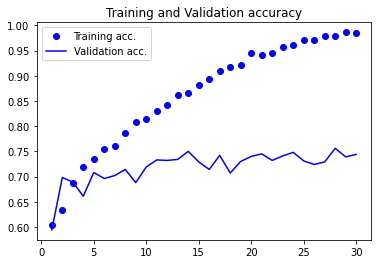

In [48]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc.')
plt.plot(epochs, val_acc, 'b', label='Validation acc.')
plt.title("Training and Validation accuracy")
plt.legend()

plt.show()

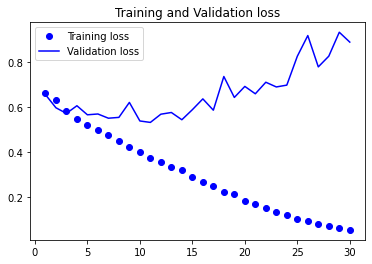

In [49]:
plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and Validation loss')
plt.legend()

plt.show()

# Handling overfitting on small image datasets

We already know of a few methods:
* L1 (LASSO) regularization
* L2 (RIDGE) regularization
* Dropout layers

Now we will be covering a new method: **data augmentation**

## Data Augmentation


Overfitting is caused by not having enough data. If there were infinite data, a neural network would never overfit, as the model would be exposed to every possible aspect of the distribution at hand.

**Data augmentation means to synthetically enlarge the training data by adding random variations to the samples. This way, during training, the model will not see the same image twice. This helps expose the model to more aspects of the data and generalize better.**

This can be accomplished using the same `ImageDataGenerator` class, by adding a few arguments. Since this isn't adding any 'new' data, it may not totally prevent overfitting. So, we'll also add a dropout layer.

In [56]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

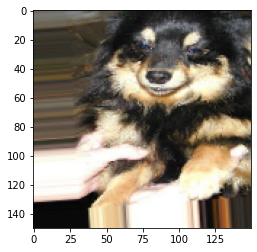

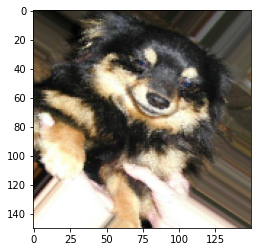

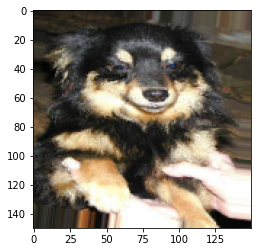

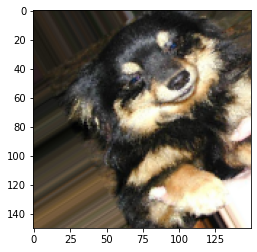

In [62]:
from keras.preprocessing import image

fnames = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]

img_path = fnames[44]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img) # converts to np array w/ shape (150, 150, 3)
x = x.reshape((1,) + x.shape) # reshapes it to (1, 150, 150, 3)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [63]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # new dropout layer

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [69]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # validation data shouldn't be augmented.

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')



history = model.fit(train_generator, steps_per_epoch=100, epochs=100,
                   validation_data=validation_generator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 29s 282ms/step - loss: 0.6310 - acc: 0.6293 - val_loss: 0.6141 - val_acc: 0.6740
